<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">On The Capacity Of Feedforward Neural Networks</div> <br>
<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Sur la Capacité des Réseaux de Neurones</div>

# Vue d'Ensemble

Tout au long de ce notebook, nous allons définir et aborder la notion de **capacité** pour les réseaux de neurones denses, tout en apportant des illustrations et des exemples concrets sous forme de courts exercices pour aider à la compréhension. Nous allons traiter un résultat central sur la capacité de ces réseaux de neurones en lien avec la qualité d'apprentissage 

# Capacité : Définition et Interprétation <a id="capacité--définition-et-interprétation"></a>

## Notations

Nous utiliserons les notations suivantes pour définir nos réseaux de neurones : <br>
Soit un réseau de neurones à $L$ couches. On notera $n_k$ le nombre de noeuds à la couche $k$. <br>
Le réseau de neurones sera alors noté $A(n_1,...,n_L)$. 

<img src="img/nn.png" width="800px"></img> <br>
Par exemple, le réseau de neurone ci-dessus peut être noté $A(5, 12, 10, 1)$. 

$n_1$ correspond à la couche d'entrée et $n_L$ à celle de sortie, on peut donc considérer qu'il y a $L-2$ couches cachées. On supposera, sauf énoncé explicitement, durant tout le notebook que le réseau est **dense** (i.e tous les noeuds d'une couches sont connctés à tous ceux de la couche suivante) et que toutes les fonctions d'activations sont des fonctions de *Heaviside* de la forme $f (x) = h(\langle a, x\rangle + \alpha)$ où $h(t)=1$ si $t > 0$ et $h(t)=0$ sinon, qu'on appelle aussi Perceptron de Rosenblatt.

Nous utiliserons la notation $a \asymp b$ d'égalité asymptotique qui signifie : $\exists$ $c_1, c_2 > 0$ tq. $c_1 b \leq a \leq c_2 b$. $a$ et $b$ peuvent être n'importe quels objets réels mais la définition n'est utile que pour les objets qui peuvent varier (suites, fonctions). <br>
Nous noterons $H^n = \{0,1\}^n$ l'hypercube booléen.

## Théorème d'Approximation Universelle

Rappelons l'énoncé informel du théorème d'approximation universelle : 

Si $\sigma$ est une fonction d'activation non-constante, continue, bornée et monotone croissante (courbe en S), alors un réseau de la forme $A(m, N, n)$ peut approcher n'importe quelle fonction continue avec une précision arbitraire à condition que $N$ puisse être arbitrairement grand. 

Plus de précisions peuvent être apportées : [Wikipedia](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_d%27approximation_universelle) et <a href="../docs/UniversalApproximationTheorem.pdf">Rappel du théorème vu en classe de DL.</a> <br>

<img src="img/approx_universelle.jpg" width="800px"></img> <br>

Ce théorème stipule qu'**en  théorie**, et sous certaines hypothèses, n'importe quelle fonction continue peut être approchée par un réseau dense à une couche cachée. Mais **en pratique**, les réseaux de neurones ont souvent plusieurs couches cachées, et certaines hypothèses ne sont plus respectées (surtout celle sur la continuité de la fonction à approcher, on préfererait approcher des fonctions plus moches...). Le notion de **capacité** permet justement de caractériser cette qualité d'approximation dans un cadre plus général et pour des réseaux de neurones à $L$ couches.

## Définition

### Capacité d'un réseau de neurones

La **capacité** d'un réseau de neurones de type $A(n_1, n_2,..., n_L)$ notée $C(A)$ est définie comme le logarithme binaire du nombre de fonctions $f : H^{n_1} \rightarrow H^{n_L}$ que le réseau est capable de calculer. <br>
<div class="alert alert alert-warning"> 

**Exercice :** Sans considérations supplémentaires, quelle est la capacité maximale théorique qu'un réseau $A(n_1, n_2,..., n_L)$ lorsque $n_1$ et $n_L$ sont fixés ? <br>
On s'appuiera simplement sur le dénombrement des fonctions $f : H^{n_1} \rightarrow H^{n_L}$

</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Solution (cliquez pour étendre la cellule)</b></summary>

En notant $N$ (resp. $M$) le nombre d'éléments dans $H^{n}$ (resp. $H^{m}$), il y a $N^M$ fonctions allant de $H^{m}$ dans $H^{n}$. Si l'on se donne un vecteur de $H^{n}$, chaque élément vaudra 0 ou 1, il y a donc 2 choix possibles par élément du vecteur, soit $2^n$ possibilités. Le même raisonnement s'applique pour $H^{m}$, ce qui donne un nombre total de ${(2^n)}^{2^m} = 2^{n 2^m}$ fonctions. On a alors une capacité maximale établie à $C(A) \leq \log_2(2^{n_L 2^{n_1}}) = n_L 2^{n_1}$
</details>

Bien sûr, la capacité maximale calculée au-dessus est bien trop grande pour être utile (faire le calcul du nombre de fonctions allant de $H^{5}$ dans $H^{2}$) et on souhaiterait obtenir des bornes plus fines pour encadrer la capacité d'un réseau de neurone. Mais d'abord, que signifie concrètement la capacité ?<br>

La capacité d'un réseau de neurones peut être vue, au-delà du nombre de fonctions binaires que le réseau peut calculer, comme un indicateur de la *complexité* des fonctions qu'il est capable d'approcher fidèlement dans un problème de regression, ou la *complexité* des régions qu'il est capable de séparer dans un problème de classification.<br>
La capacité d'un réseau de neurones est également liée à la notion d'*overfitting* et d'*underfitting* : une capacité grande caractérise une tendance à plutôt sur-apprendre et inversement.

## Intuition

Une interprétation et une intuition que l'on peut faire est la suivante : en considérant que la mémorisation (apprentissage par cœur), est le pire cas de la généralisation (on est plutôt dans l'overfitting...), la capacité peut être vue comme le nombre de bits qu'un réseau de neurones est capable de garder en mémoire. Un réseau dont la capacité est égale à la taille en bits d'un jeu de données (à un facteur près) sera alors capable de le mémoriser.  En notant $W$ le nombre total de poids dans le réseau (i.e chaque connexion qui relie deux neurones) et $C$ la capacité de l'architecture, il y aura en moyenne $\frac{C}{W}$ bits stockés dans chaque connexion, et si elle est mesurée peut donner des informations sur les neurones les plus sollicités lors de l'inférence.

La notion de capacité se rapporte à la [VC-dimension](https://en.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_dimension) issue de la théorie de Vapnik–Chervonenkis et qui définit également la capacité comme le nombre de points qu'un modèle de classification est capable de séparer.

# Résultat principal

## Théorème et éléments de preuve

<a href="../docs/the_capacity_of_feedforward_neural_networks.pdf">P. Baldi et R. Vershynin</a> offrent un résultat remarquable autour de la capacité des réseaux de neurones denses :<br>

**Théorème** : Soit un réseau de neurones $A(n_1,...,n_L)$ tq. $\forall$ $1\leq j\leq k\leq L,$ $n_j > 18\log_2{(L n_k)}$ :

<div style="text-align:center; font-size:20pt;"> 

$C(A) \asymp \sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1}$
</div>

Pour rappel, il existe donc deux constantes strictement positives $c_1$ et $c_2$ telles que $c_1\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1} \leq C(A) \leq c_2\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1}$ et il a même été prouvé que $c_2=1$ et donc $c_1 \in$ $]0;1[$. A noter que les hypothèses précédentes ne sont nécessaire que pour démontrer la **borne inférieure** du résultat et sert simplement à éviter que le nombre de neuronne par couche ne croisse trop rapidement. Pour démontrer la **borne supérieure**, il suffit d'admettre $L \geq 2$ et $n_1, \dots, n_L \geq 1$. <br>
Plusieurs informations peuvent être tirées de cette formule :
- La capacité d'un réseau de neurones dépend de $L$ le nombre de couches, un réseau plus profond aura une capacité plus grande à nombre de noeuds par couche équivalent.
- Cependant, à nombre de neurones total égal, un réseau plus profond (avec des couches plus minces) aura une capacité inférieure à un réseau plus étroit (avec des couches plus larges)
- La présence d'un "goulot d'étranglement" (une couche avec peu de neurones) réduit fortement la capacité, d'autant plus si il est situé parmi les premières couches du réseau.
- Pour refaire le lien avec le théorème d'approximation universelle, pour un réseau $A(m, N, n)$ (qui est un cas particulier et qui ne nécessite pas les mêmes hypothèses que le résultat précédent), si N est suffisamment grand, on a $C(A) \asymp m^2N$ et donc $C(A) \to +\infty$ lorsque $N \to +\infty$.

En particulier, ce résultat permet d'expliquer en partie le **paradoxe du sur-apprentissage** en Deep Learning. En effet, contrairement à l'apprentissage statistique classique, un modèle de DL peut compter énormément de paramètres, parfois même plus de paramètres que de données d'apprentissage et quand même être capable de généraliser correctement. Le capacité d'un réseau de neurones peut rester faible malgré un nombre total de neurones très grand, pour peu par exemple que l'on y trouve un goulot d'étranglement suffisamment en amont.

Bien que les hypothèses du théorème ne soient pas toujours respectées, les interprétations du résultat tiennent toujours pour comparer des architectures de réseaux de neurones entre elles. Le site [Tensorflow-Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.83992&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) permet de visualiser rapidement l'effet de l'architecture sur la capacité d'un réseau de neurone. Comparez différentes architectures entres elles pour voir l'impact de la disposition des noeuds à $L$ et $N$ égaux, puis en faisant varier $L$ et comparer le nombre d'époques nécessaire à la convergence vers une solution satisfaisante.

La preuve de ce théorème peut être décomposée en deux partie : la démonstration de la **borne inférieure** (i.e $\exists$ $c_1 > 0$ tq. $c_1\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1} \leq C(A)$) et celle de la **borne supérieure** (i.e $\exists$ $c_2 > 0$ tq. $c_2\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1} \geq C(A)$). Elle ne sera pas abordée dans ce notebook. Cependant, voici quelques éléments pouvant amener à la démonstration de la **borne supérieure** :
- Parmi les propriétés de base de la capacité, on a entre autres que la capacité d'un réseau de neurone est toujours plus petite que la somme des capacités de ses neurones (*sous-additivité*).
- Ceci donne une borne supérieure trop grossière car elle ne permet pas de prendre en compte les goulots d'étranglement.
- Il faut alors introduire la notion de *capacité d'un ensemble* qui permet par récurrence de prendre en compte les tailles des couches prédédentes dans la somme et donc de mesurer l'impact des goulots d'étranglement.

La démonstration de la **borne inférieure** est bien plus complexe et nécessite l'introduction de méthodes spécifiques telle que le *multiplexing*, l'*enrichissement* et le *stacking*.

## Capacité extremale <a id="capacité-exremale"></a>

Dans cette partie, nous étudierons les réseaux de neurones qui **maximisent** ou **minimisent** la capacité, en fixant certains paramètres de l'architecture. On considérera également la 
largeur de la couche d'entrée fixée, puisque c'est un paramètre que l'on peut rarement choisir.

### Nombre de poids fixé

Notons $W$ le nombre total de poids du réseau de neurones. Dans le cas d'un réseau dense, pour un réseau $A(n_1,\dots,n_L)$, on a $W = \sum_{k=1}^{L-1} n_k n_{k+1}$. On peut noter la similarité avec la formule pour estimer la capacité. Fixer le nombre de poids est raisonnable car cela revient quasiment à fixer le nombre de paramètres du réseau de neurones.

<div class="alert alert alert-warning"> 

**Exercice :** A nombre de poids $W$ fixé, en s'appuyant sur la formule de la capacité vue dans la partie précédente, proposer une architecture de réseau de neurone dense qui maximise la capacité, et une autre qui la minimise.

**Indices** : Pour maximiser la capacité, commencer par remarquer que pour une architecture $A(n_1,\dots,n_L)$, on a toujours $C(A) \leq n_1W$. <br>
Pour la minimisation, commencer par montrer que $C(A(n_1,\dots,n_{L-1}, 1)) \asymp C(A(n_1,\dots,n_{L-1}))$

</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Solution (cliquez pour étendre la cellule)</b></summary>

**Maximisation de la capacité** : Notons d'abords que $\forall$ $k$ $\in$ $[2, L-1]$, $\min(n_1,\dots,n_k) \leq n_1$. Par somme, $\sum_{k=1}^{L-1}\min(n_1,\dots,n_k)n_kn_{k+1} \leq n_1\sum_{k=1}^{L-1}n_kn_{k+1}$, d'où $C(A) \leq n_1W$. <br>
Le cas d'égalité est alors atteint lorsque $\forall$ $k$ $\in$ $[2, L-1]$, $n_1 \leq n_k$

**Minimisation de la capacité** : Pour montrer que $C(A(n_1,\dots,n_{L-1}, 1)) \asymp C(A(n_1,\dots,n_{L-1}))$, commençons par noter que tous les termes dans les deux sommes sont égaux sauf les derniers, qui valent respectivement $\min(n_1,\dots, n_{L-1})n_{L-1}$ et $\min(n_1,\dots, n_{L-2})n_{L-1}n_{L-2}$. Le premier étant clairement borné par le second (y compris lorsue $\min(n_1,\dots, n_{L-1}) = n_{L-1}$), on obtient bien le résultat.
La couche $n_1$ étant fixée, la première couche contribue au moins en $n_1^2$ à la capacité. et cette contribution est minimisée lorsque $n_2 = 1$. Le résultat que nous venons de démontrer montrer que l'on peut récursivement ajouter des couches à 1 neurone sans apporter de contribution à la capacité, et donc qu'on peut en ajoutant jusqu'à atteindre $W$ poids, tout en la gardant minimale. En composant les fonctions seuils d'un neurones vers le suivant, on obtient un fonction seuil, ce qui peut expliquer que l'ajout de couches à 1 neurone ne contribue pas à la capacité.
</details>

### Nombre de neurones fixé

On peut également s'intéresser à la maximisation et la minimisation des capacités lorsque $N = n_1 + \dots + n_L$ est fixé.

Pour la minimisation, le raisonnement de la partie précédente peut être appliqué et la capacité est minimisée pour une architecture du même type. <br>
Nous passerons la démonstration de la maximisation (voir le <a href="../docs/the_capacity_of_feedforward_neural_networks.pdf">chapitre 11</a>) mais il est intéressant de noter que si $n_1 \geq \frac{N}{2}$, la capacité est maximisée pour les architectures $A(n_1, N - n_1 -1,1)$ et losque $n_1 < \frac{N}{2}$, elle l'est pour les architectures $A(n_1, \frac{N}{2}, \frac{N}{2} - n_1 - 1, 1)$

### Exemple de capacités extremales

Essayons d'illustrer les extrema de capacité sur un problème de classification assez simple, à nombre de neurones fixé.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(classifier, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z,  levels=[0], linewidths=2, colors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Zones de décision du classifieur")
    plt.show()

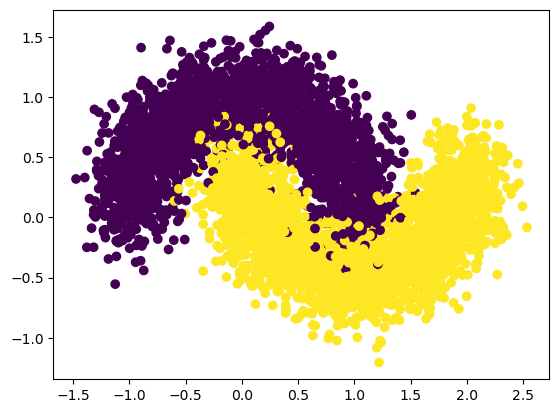

In [2]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=5000, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [3]:
lowNN = MLPClassifier(hidden_layer_sizes=(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1), activation='relu', solver='adam', max_iter=500, learning_rate_init=0.1) #Création d'un MLP à faible capacité (18 couches cachées à 1 neurone)
lowNN.fit(X_train, y_train)

highNN = MLPClassifier(hidden_layer_sizes=(10,8), activation='relu', solver='adam', max_iter=500, learning_rate_init=0.1) #Création d'un MLP à haute capacité (2 couches à 10 et 8 neurones)
highNN.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 8), learning_rate_init=0.1, max_iter=500)

Score de validation: 0.485


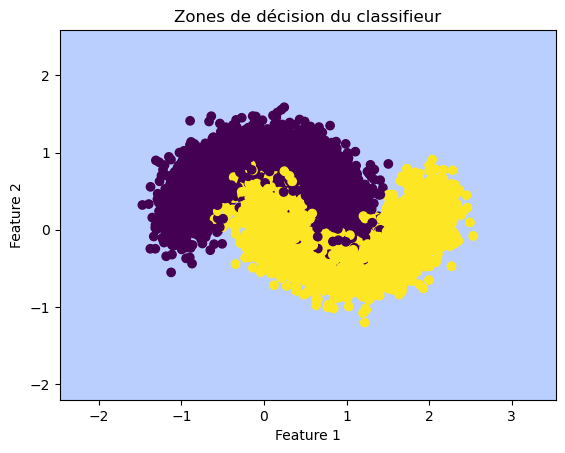

In [4]:
y_pred = lowNN.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Score de validation: {score}")
plot_decision_boundary(lowNN, X, y)

Score de validation: 0.972


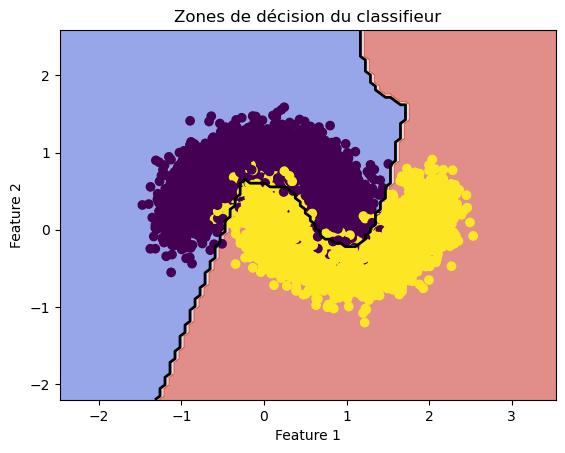

In [5]:
y_pred = highNN.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Score de validation: {score}")
plot_decision_boundary(highNN, X, y)

# "Capacité" d'un jeu de données

Les outils sur la capacité développés précédemment permettent de dimensionner correctement un réseau de neurones afin d'éviter le sur-apprentissage ou le sous-apprentissage. En disposant d'un moyen de calculer ou d'estimer la capacité nécessaire pour apprendre un jeu de donnée, on sera capable de dimensionner des réseaux de neurones adaptés à chaque jeu de donnée. Cela permettra en outre d'éviter le sur-apprentissage, mais également de ne pas mobiliser plus de capacités de calcul que nécessaire.

## Calcul de la capacité requise

Dans <a href="../docs/a_practical_approach_to_sizing_neural_networks">*A practical approach to sizing Neural Networks*</a>, une méthode heuristique est développée pour estimer la capacité nécessaire pour pouvoir apprendre un jeu de données, ainsi que la capacité maximal à ne pas dépasser pour ne pas sur-apprendre les données. Cette méthode s'appuie sur des éléments de théorie de l'information, et traite la capacité comme le nombre de bits d'information que le réseau est capable de garder en mémoire. L'algorithme ci-dssous est adapté du code fourni dans l'article afin de pouvoir être exécuté dans une cellule d'un notebook.

In [6]:
import pandas as pd
import math

def estimate_capacity(filename):
    '''
    Arguments :
    filename : chemin vers le fichier csv contenant les données d'entraînement et de test
    
    Renvoie :
    capacity : capacité estimée nécessaire
    max_capacity : capacité à ne pas dépasser
    
    '''
    
    df = pd.read_csv(filename)
    numcols = df.shape[1] - 1  # Nombre de colonnes moins la colonne de classe
    numpoints = df.shape[0]  # Nombre de lignes
    numclass1 = 0
    energies = []
    
    class1 = ''
    for index, row in df.iterrows():
        result = row[:-1].sum()
        c = row.iloc[-1]
        if class1 == '':
            class1 = c
        if c == class1:
            numclass1 += 1
        energies.append((result, c))
    
    sortedenergies = sorted(energies, key=lambda x: x[0])
    curclass = sortedenergies[0][1]
    changes = 0
    
    for item in sortedenergies:
        if item[1] != curclass:
            changes += 1
            curclass = item[1]
    
    clusters = changes + 1
    mincuts = math.ceil(math.log(clusters) / math.log(2))
    capacity = mincuts * numcols
    max_capacity = (changes * (numcols + 1)) + changes
    
    return int(math.ceil(capacity)), max_capacity

L'algorithme mesure le nombre de changement de label pour des points "proches". Cela donne une mesure de l'information stockées dans les données : si les données sont complètement aléatoires, il y aura beaucoup de changements de labels pour des points proches, ce qui donne très peu d'information. Au contraire, des point bien structurés et facilement séparables verront peu de changements de labels entre-eux, et de ce fait pourront donner plus d'information. 

La capacité d'un jeu de données dépend donc de deux choses : la taille de ce jeu de données et l'information qu'il contient. Plus un jeu de données est grand, et plus les données sont éparpillées aléatoirement, plus il demandera un architecture à capacité élevée pour être appris.

<div class="alert alert alert-warning"> 

**Exercice :** La fonction *estimate_capacity* est facilement modifiable pour prendre des dataframes pandas en entrée. Libre à vous de tester et de mesurer la capacité pour différents jeux de données, en faisant varier la taille et la complexité du jeu de données.

</div>

In [10]:
reqcap, maxcap = estimate_capacity("../data/imagenet2000.csv")

print(f"Capacité requise éstimée : {reqcap}")

Capacité requise éstimée : 10240


Essayons de faire le lien entre les notions vues précédemment pour écrire une architecture adaptée au jeu de données <a href="../data/moons.csv">*moons.csv*</a> sans sous-apprendre ni avoir une architecture trop gourmande

<div class="alert alert alert-warning"> 

**Exercice :** Proposer 2 architectures de MLP, une dont la capacité théorique est environ le dixième de celle requise par le jeu de données et une dont la capcité théorique en vaut le double. Comparer les scores d'entraînement et de validation de ces 2 architectures. (Attention il y a déja 2 noeuds pour la couche d'entrée).

</div>

In [11]:
reqcap, maxcap = estimate_capacity("../data/moons.csv")

print(f"Capacité requise estimée : {reqcap}")

Capacité requise estimée : 16


In [14]:
# %load solutions/dataset_capacity.py
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/moons.csv")
X = df[["X1", "X2"]].values
y = df["y"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversion en tenseurs
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)

class MLP(nn.Module):
    def __init__(self, hidden_layers):
        super().__init__()
        layers = []
        input_dim = 2
        for h in hidden_layers:
            layers.append(nn.Linear(input_dim, h))
            layers.append(nn.ReLU())
            input_dim = h
        layers.append(nn.Linear(input_dim, 2))  # Deux classes dans notres cas, on ne s'intéresse qu'à des problèmes de classification binaire
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# Définition de l'entraînement du modèle
def train_model(model, X_train, y_train, epochs=500, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = [] # Pour suivre l'évolution de la loss et comparer les deux architectures
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

models = {
    "Underfitting": MLP([1]),
    "Architecture adaptée": MLP([6, 6]),
}

losses = {}
for modelname, model in models.items():
    losses[modelname] = train_model(model, X_train, y_train)

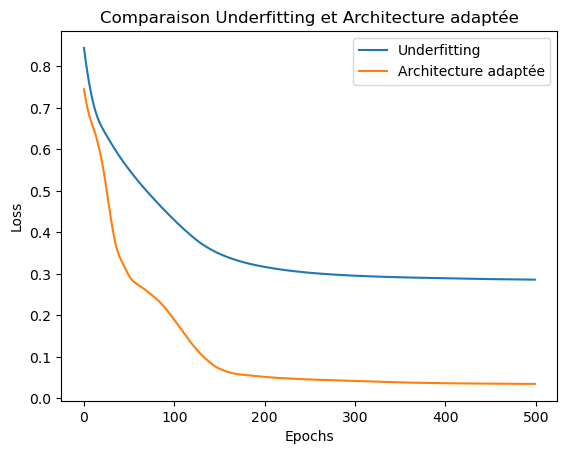

In [15]:
import matplotlib.pyplot as plt

plt.figure()
for modelname, loss in losses.items():
    plt.plot(loss, label=modelname)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Comparaison Underfitting et Architecture adaptée")
plt.show()

In [9]:
X = X_test
y = y_test

for modelname, model in models.items():
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    input_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        Z = model(input_tensor).cpu().numpy()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z,  levels=[0], linewidths=2, colors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.title(f"Zones de décision du modèle {modelname}")
    plt.show()


# Régularisation structurelle

Évidemment la méthode précédente n'est pas infaillible, des jeux de données bien plus complexes (comme des images, qui présentent des relations complexes dans leurs données) nécessitent des techniques plus avancées que le simple empilement de couches denses, et il est alors difficile de comparer des MLP entre eux. Nous pourrions alors discuter de l'impact sur la capacité de techniques qui n'ont pas été mentionnées dans ce notebook.

D'une manière générale, les techniques qui permettent d'éviter l'overfitting (dropout, pondération des poids, etc.) conduisent à une diminution de la capacité. La plupart de ces questions sont encore ouvertes. Il peut également être noté que le choix des fonctions d'activation a un impact, mais là encore la question reste ouverte.

Cependant, il est possible d'élargir le théorème vu précédemment pour des réseaux de neurones convolutionnels.

## Capacité d'un CNN 

Nous avions vu, grâce au théorème principal, que chaque couche dense dans un MLP apporte une contribution polynomiale en nombre de neurones par couche. La contribution de la couche $k$ était de $\min(n_1, \dots, n_k)n_kn_{k+1}$. Dans le cas d'un CNN, la contribution à la capacité d'une couche convolutionnelle ne dépend que de la taille du filtre qu'elle applique. En effet, si la couche $n_k$ applique un filtre de taille $m \times m$, alors elle apporte une contribution à la capacité totale de l'ordre de $m^4$.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.ToTensor()

# Chargement du dataset FashionMNIST
train_dataset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Définition du modèle CNN1 (faible capacité)
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 28 * 28, 64)
        self.fc2 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Définition du modèle CNN2 (capacité plus élevée)
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 64)
        self.fc2 = nn.Linear(64, 10) 
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
  

In [11]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=1):
    model.train()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        
        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Précision sur les données de test: {accuracy:.2f}%")
    return accuracy


In [ ]:
#Initialisation des modèles, de la loss et de l'optimiseur
model1 = CNN1()
model2 = CNN2()
criterion = nn.CrossEntropyLoss() 
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

print("Entrainemeent et évaluation du modèle à faible capacité")
train_model(model1, train_loader, criterion, optimizer1)

print("\nEntrainemeent et évaluation du modèle à haute capacité")
train_model(model2, train_loader, criterion, optimizer2)

On obtient bien des meilleurs scores d'entraînement et de validation pour un CNN à plus haute capacité, bien que la différence ne soit pas flagrante sur ce jeu de données (il suffit d'augmenter le nombre d'époque et les CNN finissent par obtenir les mêmes scores). Libre à vous d'essayer de mettre à l'épreuve la théorie sur des données encore plus complexes ! 

# Conclusion 

Tout au long de ce notebook, nous avons pu discuter de la capacité d'un réseau de neurones, faire le lien avec la qualité d'approximation et de séparation mais aussi avec les notions d'overfitting et d'underfitting. 

Le résultat principal à été accompagné d'une méthode adjointe d'estimation pour faire le lien entre la capacité d'une architecture et celle d'un jeu de données, qui a fourni des éléments pour mieux dimensionner une architecture.

Enfin, nous sommes sortis du cadre des réseaux à couches denses pour faire un tour du coté des CNN, qui selon le problème, peuvent offrir de meilleurs résultats avec une capacité théorique plus faible.

La notion de capacité est complexe, beaucoup de questions sont encore ouvertes et la réalité peut souvent démentir la théorie car beaucoup d'hypothèses ne sont pas respectées. Il faut donc la prendre avec des pincettes et s'en servir plutôt comme d'un outil lors d'une première approche, qui serait ensuite affinée par des itérations supplémentaires lors du dimensionnement d'un réseau de neurones.

# Annexes

## Capacité d'un ensemble

Dans la plupart des preuves des concepts qui précédent intervient la notion de **capacité d'un ensemble** (correspondant ici à l'ensemble des données d'entrée). Soit $S \subset \mathbb{R}^n$, soit $T(S)$ l'ensemble des fonctions seuils (i.e $f (x) = h(\langle a, x\rangle + α)$ de $S$ dans $\{0,1\}$ où $a \in \mathbb{R}^n$ et $\alpha \in \mathbb{R}$). <br>
On définit alors la **capacité de l'ensemble $S$** comme le logarithme binaire du nombre de fonctions seuils sur $S$, ou $C(S)=\log_2|T(S)|$

On peut alors définir $C(S, n_1, \dots, n_L)$ la capacité d'une architecture $A(n_1, \dots, n_L)$ comme la capacité de $A$ dont les données d'entrée sont restreintes à l'ensemble $S \subset \mathbb{R}^{n_1}$

## Propriétés de base de la capacité

Voici 6 propriétés classiques sur la capacité qui peuvent servir dans des preuves ou des exrcices dans le notebook : 

*1. Invariance affine* : Soit une transformation affine inversible $F : \mathbb{R}^{n_1} \to \mathbb{R}^{n_1}$, alors : <br>
$$C(F(S), n_1, \dots, n_L) = C(S, n_1, \dots, n_L)$$

*2. Monotonie* : Si $n_k \leq m_k$ pour tout $k$ alors : <br>
$$C(n_1, \dots, n_L) \leq C(m_1, \dots, m_L)$$

*3. Sous-additivité* : Pour tout $1 \leq k \leq L-1$ : <br>
$$C(n_1, \dots, n_L) \leq C(n_1, \dots, n_k) + C(n_{k+1}, \dots, n_L)$$

*4. Contractivité* : Répeter une ou plusieurs couches ne peut qu'augmenter la capacité : <br>
$$C(n,m,p) \leq C(n,m,m,m,p)$$

*5.* Pour tout $S \subset \mathbb{R}^n$, on a : <br>
$$C(S,n,m) = C(S)m$$

*6.* Pour tout $S \subset \mathbb{R}^n$ et pour toute application seuil $f : \mathbb{R}^{n_1} \to H^{n_2}$ (i.e application dont les composantes sont des fonctions seuils), on a :<br>
$$C(f(S), n_2, \dots, n_L) \leq C(S, n_1, \dots, n_L)$$